# Energy Management in Buildings: static thermal modeling [6h]
### author: stephane.ploix@grenoble-inp.fr 

- __Student name(s)__:

- __Teaching program followed__: 

**Your answers to questions in assignment files, must be returned by one week after the latest session.**

__Duration:__ 10h

__Prerequisites:__ Basic knowledge about modeling physical systems, plus basic skills of the Python language.

__Advice:__ Each question has a unique number so that you can use any kind of document to put your answers, providing the question numbers are mentioned. Don't wait for the end to test your way of collecting results. You can work directly in the notebook but be careful not to loose your responses (copy and export them regularly).

The lecture is designed as a tutorial to follow with an estimation of the needed time to solve each problem. It is composed of Jupyter notebooks, named notebookx_XXX.ipynb and example python files, located at the root folder. The core well-documented Python code is located in the _buildingenergy_ folder, but it's for curious people (it's not needed for solving the problems of the notebooks). Data like weather files (extension '.json'), thermal and physical properties (file named propertiesDB.xlsx) are located in the _data_ folder. When a file is generated, it will be located in the _result_ folder like physical parameters for simplified models (extension '.p'). All these folders can be reset thanks to the _"setup.ini" configuration file__

Regarding your working environment, it is recommended to:
- Install the latest available version of Python (3.9 minimum but preferably 3.11) activating the checkbox "Install in the path of your operating system", either directly from the [Python distribution site](https://www.python.org/downloads/), or by using [Anaconda](https://www.anaconda.com/products/distribution), that embeds Python together with additional useful scientific librairies.
- Load and install the latest version of (Visual Studio code)[https://code.visualstudio.com] for your operating system and load from the VS studio extensions: Python from Microsoft and Jupyter from Microsoft.
- Go to the [git site of the building energy project](https://gricad-gitlab.univ-grenoble-alpes.fr/ploixs/buildingenergy) and download it as a zip file. Unzip and open with Visual Studio code. If the Internet connection is not tool slow, you can access a [MyMinder](https://bit.ly/3QbtIPK) site, where the code can be remote remotely.
- In the terminal of Visual Studio code, you can installed the modules dependencies using ```python3.X -m pip install -r requirements.txt```where x stands for the number of the Python version selected in Visual Studio code.
- Open the working folder with the unzipped files and double-click on the notebook you want. 
- Execute each cell following the proposed order.
  
_______________________________________________

# I. Introduction

## I.1 Understanding the energy systems in the territory of the Presqu'île Scientifique [20min]

Depict the energy mechanisms of the "Presqu'île Scientifique" by analyzing the file [Transect_Presqu_ILE.pdf](img/TRANSECT_PRESQU_ILE.pdf), in particular, dealing with:
- production and sources
- transportation and distribution
- main consumption places
  
__your results I.1>__

## I.2 RE2020 (E+C-) at home

Thanks to the 5 videos from CSTB [E+C-](http://www.cstb.fr/fr/actualites/detail/energie-carbone-videos-pedagogiques-1702/), summarize the new standard E+C- that has led to the energy standard: RE2020.

__your results I.2>__

## I.3 GreEn-ER/PREDIS HVAC system [20min]

Thanks to the previous sketches, depict the behavior of the GreEN-ER HVAC system : [greener_hvac.pdf](img/greener_hvac.pdf) and [mhi-fluides.pdf](img/mhi-fluides.pdf).

__your results I.3>__

## II.1 Static modeling: an office

In order to generate efficient energy strategies, we are going to model the H358 office and compare the resulting estimations to the actual measurements. We will focus on the H358 office temperature but also on CO2 concentration. We will start by neglecting the transcient behavior but it will be reconsidered in the next session. During session 4, we will ajust the model parameter values to better fit the on-site recorded measurement. Session 5 is dedicated to the design of energy management strategies. The models we are going to develop can be used both for simulating the effect of an energy strategy, and for the design of strategy thanks to an inverse problem solving.

Energy management is quite different from building design where model must be fine enough to aid designer to take decisions. Models for the design of buildings represent virtual buildings (i.e. they will be constructed later) with their inhabitants whereas models for energy management have to match as accurate as possible measurements collected on an existing building. Because too many parameters yield identifiability issues, these models have to contain little number of parameters but must still be representative of the reality i.e. of the measurements.

Here are few photographs of the H358 office.

![](img/picture_office.png)

Dimensions of the envelope are given by the following maps with cuts.

![](img/map_office.png)

# Part Physical modeling [3h00]

## 2. Wasteful surfaces

__With a qualitative perspective, what are the dominant thermal losses and identify the main wasteful surfaces to be considered?__

__your results 2.0>__


## 3. Modeling surface phenomena [60min]

Before going further, let's remind the basic principles of static thermal modeling.

## 3.1 Reminding convection and radiation [30min]

Let's call a wall, an interface between 2 zones with the same temperature on both side. A wall can be made of several components, like for the corridor wall with a door, a plain wall, etc..., having a surface each, and a composition of different layers. Regarding composition, it's easier to work with equivalent unit (for $1m^2$) thermal resistances $R$ in $K/W.m^2$ connected in series, while reasoning with transmission coefficient $U$ in $W/m^2/K$ is easier when assembling walls because in each case, we just have to sum up. Of course, we have $U=1/R$.

We have seen that for air layers, there are surface phenomena with solid walls like infrared radiations or convective resistance. Air is never immobile in common situation, molecules are moving i.e. there are convections, therefore there are specific ways to model the thermal behavior of an air layer.

### 3.1.1 Relative importance of convection and radiation [15min]

Let's consider a single 10cm thick concrete deperditive wall ($\lambda=1$), part of a building in Grenoble. Evaluate the relative importance of the convective phenomena and of the radiative phenomena. Fill the following table and conclude. What should happen in case of insulation? 

| wall                                               | transmitivity (U) | heat loss |
|----------------------------------------------------|-------------------|-----------|
| alone(only conductivity)                           |                   |           |
| with convection (default)                          |                   |           |
| with convection (no wind)                          |                   |           |
| with convection (max wind)                         |                   |           |
| with convection (default) and radiation (avg Tout) |                   |           |
| with convection (default) and radiation (min Tout) |                   |           |
| with convection (default) and radiation (max Tout) |                   |           |

__your results 3.1.1>__

### 3.1.2 Celestial vault [15min]

Using the model in the slides (notebook2.pdf, pp. 66-67), take into account the celestial vault (cloudiness 0%  and 100%) for outdoor temperatures equal to 0°, 13°, 26° (indoor in 20°). Compute the heatflow echange from the surface of the wall for each case with the celestial, compare with accounting only with the $h_r$ as proposed by RT2012 and RE2020, and conclude.

__your results 3.1.2>__


### 3.2 Computation of office thermal resistances [30min]

Propose a static thermal model for energy management by computing corridor_resistance and out_resistance. For this purpose, you can create compositions (pre-existing materials are 'concrete', 'glass', 'wood', 'plaster', 'foam', 'polystyrene' and 'brick') like below.


__Using the code below, describe the office in order to obtain the thermal resistances and transmitivities. Comment the results: where are the largest heat exchanges?__

__your results 3.2>__


In [2]:
from __future__ import annotations

import buildingenergy.thermal
import buildingenergy.physics
import buildingenergy.parameters
import buildingenergy.building

import matplotlib.pyplot as plt

library = buildingenergy.physics.Library()
library.store('concrete', 'thermal', 269)
library.store('gypsum', 'thermal', 265)
library.store('wood_floor', 'thermal', 264)
library.store('tile', 'thermal', 236)
library.store('glass_wood', 'thermal', 261)
library.store('glass', 'thermal', 267)
library.store('plaster', 'thermal', 265)
library.store('foam', 'thermal', 260)
library.store('polystyrene', 'thermal', 145)
library.store('brick', 'thermal', 268)
library.store('wood', 'thermal', 277)
library.store('air', 'thermal', 259)
library.store('usual', 'thermal', 278)
buildingenergy.building.VentilatedBuilding.library = library

h358_office_site = buildingenergy.building.VentilatedBuilding('office', 'corridor', 'downstairs')


# corridor wall
door_surface = 80e-2 * 200e-2
door = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.DOOR, door_surface)
door.add_layer('wood', 5e-3)
door.add_layer('air', 15e-3)
door.add_layer('wood', 5e-3)

glass_surface = 100e-2 * 100e-2
glass: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.GLAZING, glass_surface)
glass.add_layer('glass', 4e-3)

internal_wall_thickness = 13e-3 + 34e-3 + 13e-3
cupboard_corridor_surface: float = (185e-2 + internal_wall_thickness + 34e-2 + 20e-3) * 2.5
corridor_wall_surface: float = (408e-2 + 406e-2 + internal_wall_thickness) * 2.5 - door_surface - glass_surface - cupboard_corridor_surface

cupboard: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.WALL, cupboard_corridor_surface)
cupboard.add_layer('plaster', 13e-3)
cupboard.add_layer('foam', 34e-3)
cupboard.add_layer('plaster', 13e-3)
cupboard.add_layer('air', 50e-2 - 20e-3)
cupboard.add_layer('wood', 20e-3)

plain_corridor_wall: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.WALL, corridor_wall_surface)
plain_corridor_wall.add_layer('plaster', 13e-3)
plain_corridor_wall.add_layer('foam', 34e-3)
plain_corridor_wall.add_layer('plaster', 13e-3)

# outdoor wall
west_glass_surface = 2 * 130e-2 * 52e-2 + 27e-2 * 52e-2 + 72e-2 * 52e-2
east_glass_surface = 36e-2 * 56e-2
windows_surface = west_glass_surface + east_glass_surface
nocavity_surface = (685e-2 - 315e-2 - 60e-2) * 2.5 - east_glass_surface
cavity_surface = 315e-2 * 2.5 - west_glass_surface

windows: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'outdoor', buildingenergy.building.InterfaceType.WALL, windows_surface)
windows.add_layer('glass', 4e-3)
windows.add_layer('air', 12e-3)
windows.add_layer('glass', 4e-3)

plain_wall: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'outdoor', buildingenergy.building.InterfaceType.WALL, nocavity_surface)
plain_wall.add_layer('concrete', 30e-2)

cavity_wall: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'outdoor', buildingenergy.building.InterfaceType.WALL, cavity_surface)
cavity_wall.add_layer('concrete', 30e-2)
cavity_wall.add_layer('air', 34e-2)
cavity_wall.add_layer('wood', 20e-3)

# slab
slab_effective_thickness = 11.9e-2
slab_surface = (309e-2 + 20e-3 + 34e-2) * (406e-2 + internal_wall_thickness) + 408e-2 * (273e-2 - 60e-2) - 315e-2 * (34e-2 + 20e-3) - (185e-3 + internal_wall_thickness) * 50e-2
slab = h358_office_site.side('office', 'downstairs', buildingenergy.building.InterfaceType.WALL, slab_surface)
slab.add_layer('concrete', slab_effective_thickness)

print(h358_office_site)

print(h358_office_site.get_interfaces_thermal_resistances())

Site has been propagated: False with thermal state space order: -1
zone "office" with an temperature "TZoffice", and airflows quantities: "{}" (is_known: False, is_simulated: False) and power gain "PZoffice"
   with incoming air flows:

   and outgoing air flows:
zone "corridor" with an temperature "TZcorridor", and airflows quantities: "{}" (is_known: False, is_simulated: False) and power gain "PZcorridor"
   with incoming air flows:

   and outgoing air flows:
zone "downstairs" with an temperature "TZdownstairs", and airflows quantities: "{}" (is_known: False, is_simulated: False) and power gain "PZdownstairs"
   with incoming air flows:

   and outgoing air flows:
zone "outdoor" with an temperature "TZoutdoor", and airflows quantities: "{}" (is_known: False, is_simulated: False)
   with incoming air flows:

   and outgoing air flows:

side (office, outdoor > 28.70W/K):
	- layered interface (office, outdoor) type: InterfaceType.WALL surface: 2.068m2 with losses at 10.78W/K composed o

## 4.0 Thermal bridges [60min]

### 4.1 Understanding thermal bridges [30min]

Using the finite element method developed in SEM 2A, the following results have been obtained (neglecting the surface convections).

Summarize the results in the following table and conclude. What about the distribution of temperatures in the walls? Deduce the linear transmission coefficient ($Psi$) in each case. When thermal bridges must be considered?

__your results 4.1__>

| case                                                                        | heatflow | resistance | transmitivity | $\Psi^{[1]}$ |
|-----------------------------------------------------------------------------|----------|------------|---------------|--------|
| 4.1.1 concrete wall                                                         |          |            |               |        |
| 4.1.2 concrete wall with insulation                                         |          |            |               |        |
| 4.1.3 concrete wall with intermediate floor                                 |          |            |               |        |
| 4.1.4 concrete wall with intermediate floor and outdoor insulation          |          |            |               |        |
| 4.1.5 concrete wall with intermediate floor and indoor insulation           |          |            |               |        |
| 4.1.6 concrete wall with intermediate floor and balcony                     |          |            |               |        |
| 4.1.7 concrete wall with intermediate floor, indoor insulation and balcony  |          |            |               |        |
| 4.1.8 concrete wall with intermediate floor, outdoor insulation and balcony |          |            |               |        |

$\text{note}^{[1]}$: $\Psi$ is the linear thermal transmitivity, like "Us" but mulyiplied by a length. It's unit is in W/m.K. It uses to be calculated by subtracting the trnasmitivity in the same situation but where the intermediate floor is not taken into account to the situation where it is done. 

#### 4.1.1 Concrete wall

Grid is:
x_grid=0.99,1.0,1.1,1.11
y_grid=-1.0,-0.73375,-0.4675,-0.20125000000000004,0.06499999999999995,0.33124999999999993,0.5974999999999999,0.8637499999999999,1.13


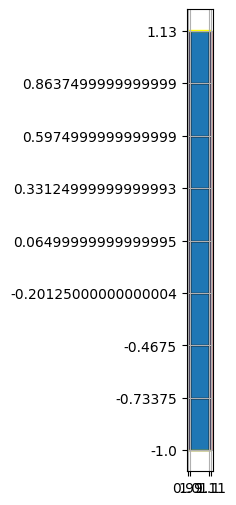

heatflow: 201.415861 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 0.099297 m.K/W
transmitivity: 10.070793 W/m.K


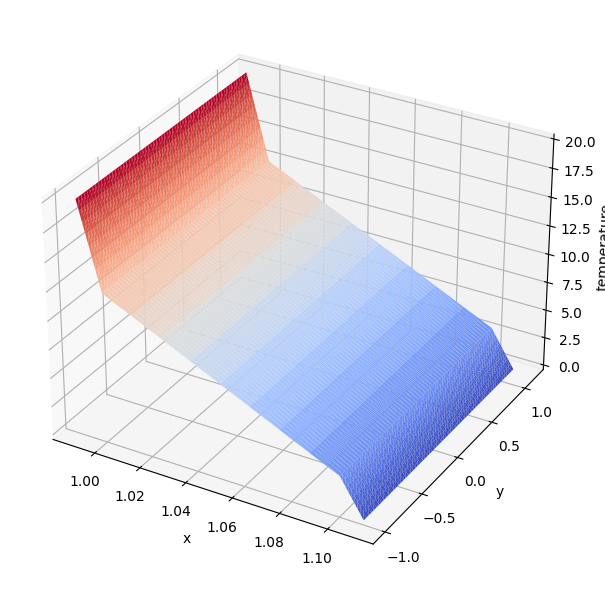

In [3]:
from buildingenergy.fem2D import *

concrete_wall().solution_plot()

#### 4.1.2 concrete wall with insulation

Grid is:
x_grid=0.99,1.0,1.1,1.3,1.31
y_grid=-1.0,-0.73375,-0.4675,-0.20125000000000004,0.06499999999999995,0.33124999999999993,0.5974999999999999,0.8637499999999999,1.13


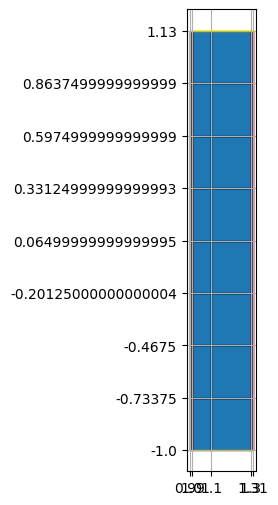

heatflow: 10.196446 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 1.961468 m.K/W
transmitivity: 0.509822 W/m.K


In [3]:
from buildingenergy.fem2D import *

concret_wall_with_insulation().solution_plot()

#### 4.1.3 concrete wall with intermediate floor

Grid is:
x_grid=0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.99,1.0,1.1,1.11
y_grid=-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.01,0,0.13,0.14,0.255,0.37999999999999995,0.5049999999999999,0.6299999999999999,0.7549999999999999,0.8799999999999999,1.005,1.13


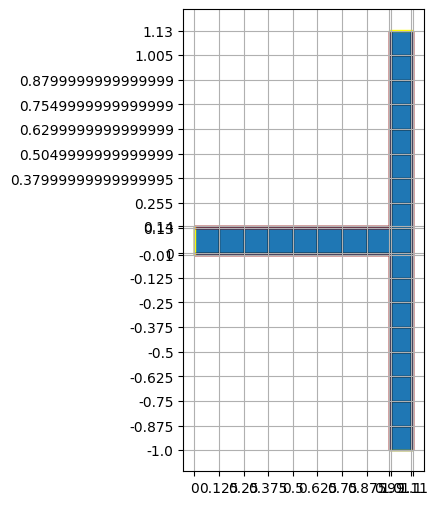

heatflow: 188.453237 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 0.106127 m.K/W
transmitivity: 9.422662 W/m.K


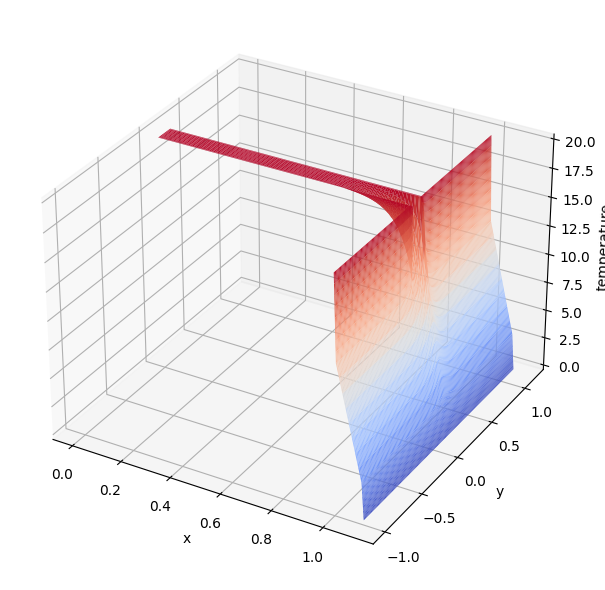

In [4]:
from buildingenergy.fem2D import *

concret_wall_with_intermediate_floor().solution_plot()

#### 4.1.4 Concrete wall with intermediate floor and outdoor insulation

Grid is:
x_grid=0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.99,1.0,1.1,1.3,1.31
y_grid=-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.01,0,0.13,0.14,0.255,0.37999999999999995,0.5049999999999999,0.6299999999999999,0.7549999999999999,0.8799999999999999,1.005,1.13


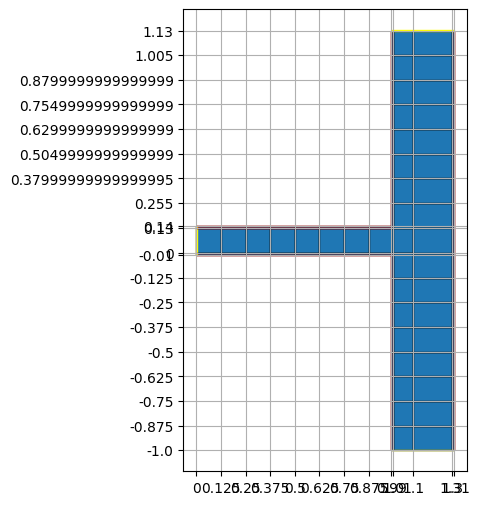

heatflow: 9.337372 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 2.141930 m.K/W
transmitivity: 0.466869 W/m.K


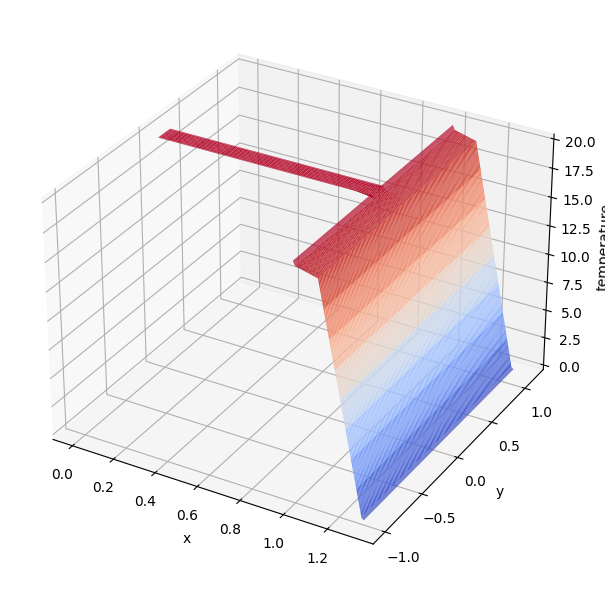

In [5]:
from buildingenergy.fem2D import *


concrete_wall_with_intermediate_floor_outdoor_insulation().solution_plot()

#### 4.1.5 Concrete wall with intermediate floor and indoor insulation

Concrete wall with intermediate floor and indoor insulation

Grid is:
x_grid=0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.99,1.0,1.2,1.3,1.31
y_grid=-1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,0,0.13,0.255,0.37999999999999995,0.5049999999999999,0.6299999999999999,0.7549999999999999,0.8799999999999999,1.005,1.13


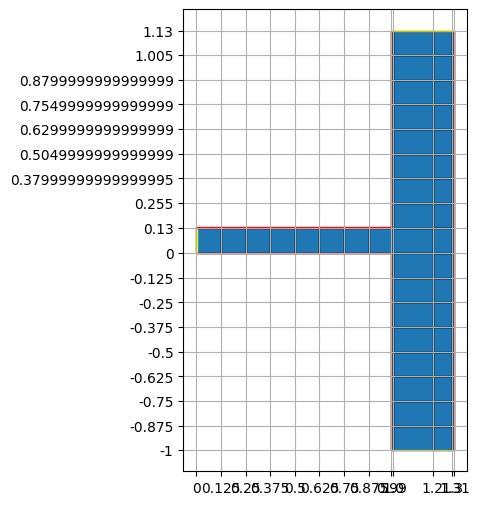

heatflow: 10.805708 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 1.850874 m.K/W
transmitivity: 0.540285 W/m.K


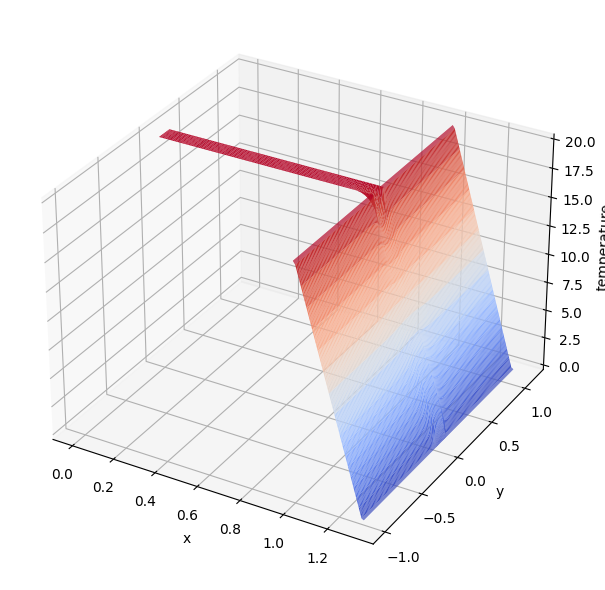

In [6]:
from buildingenergy.fem2D import *

concrete_wall_with_intermediate_floor_indoor_insulation().solution_plot()

#### 4.1.6 Concrete wall with intermediate floor and balcony

Grid is:
x_grid=0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.99,1.0,1.1,1.11,1.225,1.35,1.475,1.6,1.725,1.85,1.975,2.1,2.11
y_grid=-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.01,0,0.13,0.14,0.255,0.37999999999999995,0.5049999999999999,0.6299999999999999,0.7549999999999999,0.8799999999999999,1.005,1.13


heatflow: 222.750542 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 0.089787 m.K/W
transmitivity: 11.137527 W/m.K


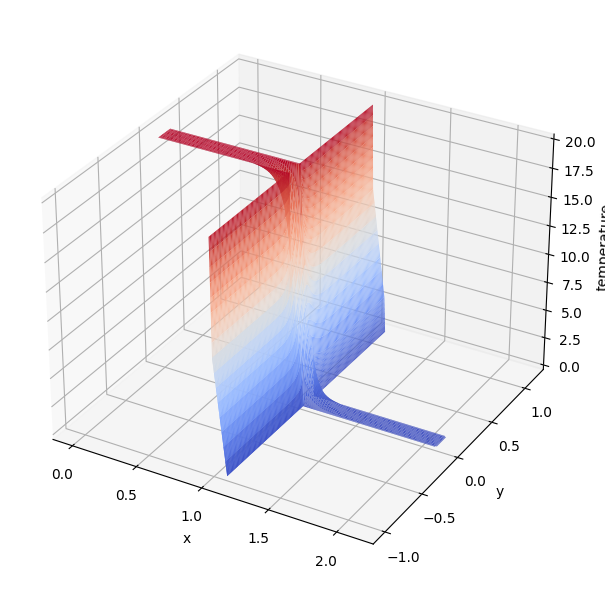

In [7]:
from buildingenergy.fem2D import *

concrete_wall_with_intermediate_floor_balcony().solution_plot()

#### 4.1.7 Concrete wall with intermediate floor, indoor insulation and balcony

Grid is:
x_grid=0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.99,1.0,1.2,1.3,1.31,1.4249999999999998,1.5499999999999998,1.6749999999999998,1.7999999999999998,1.9249999999999998,2.05,2.175,2.3
y_grid=-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.01,0,0.13,0.14,0.255,0.37999999999999995,0.5049999999999999,0.6299999999999999,0.7549999999999999,0.8799999999999999,1.005,1.13


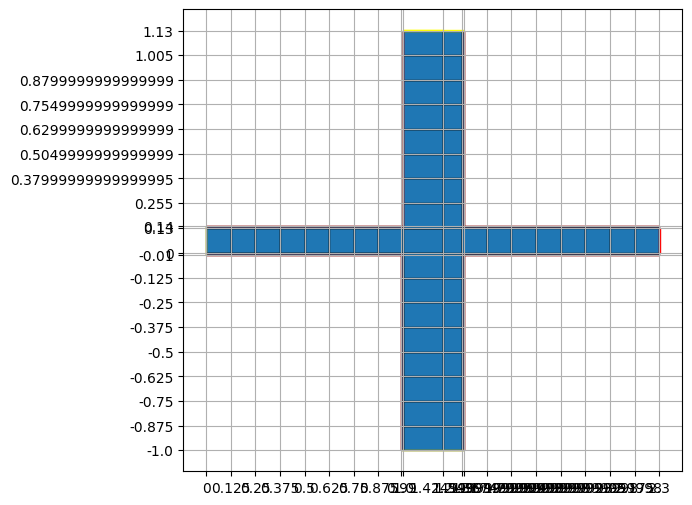

heatflow: 16.965465 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 1.178865 m.K/W
transmitivity: 0.848273 W/m.K


In [8]:
from buildingenergy.fem2D import *

concrete_wall_with_intermediate_floor_indoor_insulation_balcony().solution_plot()

#### 4.1.8 Concrete wall with intermediate floor, outdoor insulation and balcony

Grid is:
x_grid=0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.99,1.0,1.1,1.3,1.31,1.4249999999999998,1.5499999999999998,1.6749999999999998,1.7999999999999998,1.9249999999999998,2.05,2.175,2.3,2.31
y_grid=-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.01,0,0.13,0.14,0.255,0.37999999999999995,0.5049999999999999,0.6299999999999999,0.7549999999999999,0.8799999999999999,1.005,1.13


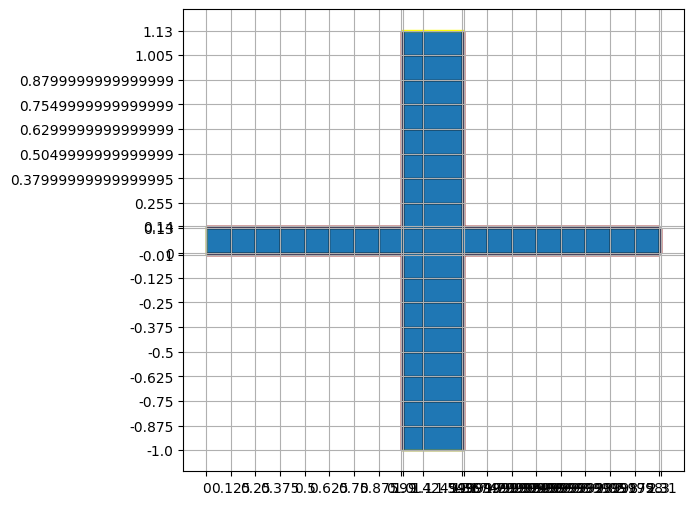

heatflow: 10.110902 W
temperatures: 20.000000°C, 0.000000°C
thermal resistance: 1.978063 m.K/W
transmitivity: 0.505545 W/m.K


In [9]:
from buildingenergy.fem2D import *

concrete_wall_with_intermediate_floor_outdoor_insulation_balcony().solution_plot()

### 4.2 Modeling thermal bridges [30min]

Determine the characteristics of the main thermal bridge between the external wall and the floor using the ThBat [RT2012_Th-U](doc/RT2012_Th-U.pdf from page 250). What is the impact on the thermal performances ('Us')? Compare with the value you found before. Sketch the equivalent electric circuit with the resistance values, including thermal bridges? What are the different sources of heat?

Here is an example about how to introduce thermal bridges:
```Python

bridge = site.add_component_interface('indoor', 'outdoor', InterfaceType.BRIDGE, 0.77, 2.5)  # first number stands for Psi, the linear transmission coefficient and second for the length of the linear bridge
```

__your results 4.2>__

In [5]:
import buildingenergy.thermal
import buildingenergy.physics
import buildingenergy.parameters
import buildingenergy.building

import matplotlib.pyplot as plt

library = buildingenergy.physics.Library()
library.store('concrete', 'thermal', 269)
library.store('gypsum', 'thermal', 265)
library.store('wood_floor', 'thermal', 264)
library.store('tile', 'thermal', 236)
library.store('glass_wood', 'thermal', 261)
library.store('glass', 'thermal', 267)
library.store('plaster', 'thermal', 265)
library.store('foam', 'thermal', 260)
library.store('polystyrene', 'thermal', 145)
library.store('brick', 'thermal', 268)
library.store('wood', 'thermal', 277)
library.store('air', 'thermal', 259)
library.store('usual', 'thermal', 278)
buildingenergy.building.VentilatedBuilding.library = library

h358_office_site = buildingenergy.building.VentilatedBuilding('office', 'corridor', 'downstairs')


# corridor wall
door_surface = 80e-2 * 200e-2
door = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.DOOR, door_surface)
door.add_layer('wood', 5e-3)
door.add_layer('air', 15e-3)
door.add_layer('wood', 5e-3)

glass_surface = 100e-2 * 100e-2
glass: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.GLAZING, glass_surface)
glass.add_layer('glass', 4e-3)

internal_wall_thickness = 13e-3 + 34e-3 + 13e-3
cupboard_corridor_surface: float = (185e-2 + internal_wall_thickness + 34e-2 + 20e-3) * 2.5
corridor_wall_surface: float = (408e-2 + 406e-2 + internal_wall_thickness) * 2.5 - door_surface - glass_surface - cupboard_corridor_surface

cupboard: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.WALL, cupboard_corridor_surface)
cupboard.add_layer('plaster', 13e-3)
cupboard.add_layer('foam', 34e-3)
cupboard.add_layer('plaster', 13e-3)
cupboard.add_layer('air', 50e-2 - 20e-3)
cupboard.add_layer('wood', 20e-3)

plain_corridor_wall: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'corridor', buildingenergy.building.InterfaceType.WALL, corridor_wall_surface)
plain_corridor_wall.add_layer('plaster', 13e-3)
plain_corridor_wall.add_layer('foam', 34e-3)
plain_corridor_wall.add_layer('plaster', 13e-3)

# outdoor wall
west_glass_surface = 2 * 130e-2 * 52e-2 + 27e-2 * 52e-2 + 72e-2 * 52e-2
east_glass_surface = 36e-2 * 56e-2
windows_surface = west_glass_surface + east_glass_surface
nocavity_surface = (685e-2 - 315e-2 - 60e-2) * 2.5 - east_glass_surface
cavity_surface = 315e-2 * 2.5 - west_glass_surface

windows: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'outdoor', buildingenergy.building.InterfaceType.WALL, windows_surface)
windows.add_layer('glass', 4e-3)
windows.add_layer('air', 12e-3)
windows.add_layer('glass', 4e-3)

plain_wall: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'outdoor', buildingenergy.building.InterfaceType.WALL, nocavity_surface)
plain_wall.add_layer('concrete', 30e-2)

cavity_wall: buildingenergy.building.LayeredInterface = h358_office_site.side('office', 'outdoor', buildingenergy.building.InterfaceType.WALL, cavity_surface)
cavity_wall.add_layer('concrete', 30e-2)
cavity_wall.add_layer('air', 34e-2)
cavity_wall.add_layer('wood', 20e-3)

# slab
slab_effective_thickness = 11.9e-2
slab_surface = (309e-2 + 20e-3 + 34e-2) * (406e-2 + internal_wall_thickness) + 408e-2 * (273e-2 - 60e-2) - 315e-2 * (34e-2 + 20e-3) - (185e-3 + internal_wall_thickness) * 50e-2
slab = h358_office_site.side('office', 'downstairs', buildingenergy.building.InterfaceType.WALL, slab_surface)
slab.add_layer('concrete', slab_effective_thickness)

#### UPDATE THE NEXT LINE
bridge = h358_office_site.add_component_interface('office', 'outdoor', buildingenergy.building.InterfaceType.BRIDGE, 0, 0)  # ThBAT booklet 5, 3.1.1.2, 22B)

print(h358_office_site)

Site has been propagated: False with thermal state space order: -1
zone "office" with an temperature "TZoffice", and airflows quantities: "{}" (is_known: False, is_simulated: False) and power gain "PZoffice"
   with incoming air flows:

   and outgoing air flows:
zone "corridor" with an temperature "TZcorridor", and airflows quantities: "{}" (is_known: False, is_simulated: False) and power gain "PZcorridor"
   with incoming air flows:

   and outgoing air flows:
zone "downstairs" with an temperature "TZdownstairs", and airflows quantities: "{}" (is_known: False, is_simulated: False) and power gain "PZdownstairs"
   with incoming air flows:

   and outgoing air flows:
zone "outdoor" with an temperature "TZoutdoor", and airflows quantities: "{}" (is_known: False, is_simulated: False)
   with incoming air flows:

   and outgoing air flows:

side (office, outdoor > 28.70W/K):
	- layered interface (office, outdoor) type: InterfaceType.WALL surface: 2.068m2 with losses at 10.78W/K composed o

### 5. Modeling air infiltration [30min]

Let's assume there is an air exchange with outdoor through the windows' joineries and that the airflow is going to the corridor (there is an suction duct in the toilet connected to the corridor). Determine the air flow with outdoor from the following experiment: the $CO_2$ concentration has been recorded just after everybody left the office at the end of a day. The total room infiltration can be guessed. Note that the office volume has to be calculated from dimension metering.

![](img2/CO2_XP.png)

Compute the infiltration air flows without considering the dynamics, with an estimation of the minimum and the maximum values. Compute the resistance value due to infiltration and compare it with the value you found before. What about the importance of air infiltration on the thermic?

__your results 5.0>__

# Part First simulation model [3h00min]

## 6. Estimation of the heating and cooling needs with the Heat Day Degrees (DJU chaud 21°) [60min]

Let's model the power gains due to solar gains through the windows (glazzing has a 40% solar factor), re-using your calculation of close solar mask and skyline from notebook1. Estimate the body metabolism power (100W/body) and the electric appliances by analyzing the recorded values.

Run the following code to generate an Excel file named "H358.xslsx" in the results folder containing the Heating Day Degrees and the daily solar gains (in Wh) through the window. 

__Estimate the heating needs with HDD and deduce an estimation of the gain "heater_power_per_delta_surface_temperature" to multiply with the dT_heat (Theater - Toffice) to get the heating power of the heater. "heater_power_per_delta_surface_temperature" stands for the heat provided by the heater when the difference of measured temperatures between its surface and the office is equal to 1°C__

__your result 6.0__>

The first piece of code generates an Excel file named H358.xslx containing HDD and solar radiation in the result folder.

The second one is used to generate dT_heat.

In [6]:
import buildingenergy.openweather
import buildingenergy.solar
import configparser

weather_file_name: str = 'grenoble1979-2022.json'
weather_year: int = 2021
albedo = 0.1
location: str = 'Grenoble'

open_weather_map_json_reader = buildingenergy.openweather.WeatherJsonReader(weather_file_name, from_stringdate='1/01/%i' % weather_year, to_stringdate='1/01/%i' % (weather_year+1), albedo=albedo, pollution=0.1, location=location)
site_weather_data = open_weather_map_json_reader.site_weather_data

window_solar_mask = buildingenergy.solar.RectangularMask((-86, 60), (20, 68)) 

solar_model = buildingenergy.solar.SolarModel(site_weather_data)
solar_system = buildingenergy.solar.SolarSystem(solar_model)
solar_system.add_collector('windows', surface=2, exposure_in_deg=-13, slope_in_deg=90, solar_factor=0.40, collector_mask=window_solar_mask)

config = configparser.ConfigParser()
config.read('setup.ini')
solar_system.generate_xls(config['folders']['results']+'H358', heat_temperature_reference=21, cool_temperature_reference=26)

Heating day degrees
day degrees January :  543.0759239130433
day degrees February :  359.23652173913035
day degrees March :  393.21094861660083
day degrees April :  295.88652173913044
day degrees May :  226.1495652173913
day degrees June :  30.78739130434783
day degrees July :  35.30434782608696
day degrees August :  52.17347826086956
day degrees September :  58.99304347826086
day degrees October :  244.89869565217393
day degrees November :  394.0083152173913
day degrees December :  515.251304347826
Cooling day degrees
day degrees January :  0
day degrees February :  0
day degrees March :  0
day degrees April :  0
day degrees May :  0
day degrees June :  0
day degrees July :  0
day degrees August :  4.714782608695657
day degrees September :  0
day degrees October :  0
day degrees November :  0
day degrees December :  0


__your results 6.0>__

## 7. Heating system [30min]

The heater is fed by a central fuel boiler distributing hot water to each radiator in offices and classrooms of the site. 
Compare the relative importance of the different source of heat (from heater, body metabolism, sun and electric appliances). 

In [7]:
from __future__ import annotations
from sites.data_h358 import H358Data, H358ParameterizedDataSet,H358ParameterSet
from buildingenergy.data import DataProvider

parameters: H358ParameterSet = H358ParameterSet()
data = H358Data('15/02/2015', '15/02/2016')
data_provider = DataProvider(parameters, data)
H358ParameterizedDataSet(data_provider)
data_provider.plot()

variables read from file measurement file:
stringtime, epochtime, datetime, Toffice_wall, Tcorridor, Theater, Toffice_reference, office_CO2_concentration, corridor_CO2_concentration, zetaW7, zetaW9, window_opening, door_opening, power_block_east, power_block_west, power_stephane, power_khadija, power_audrey, power_stagiaire, humidity, Tyanis, occupancy, detected_motions, illuminance_old, illuminance_new, dT_heat, power_heater, heating_level, total_electric_power, actual_occupation, acoustic_pressure_dB, 
Variable zetaW7 has been removed
Variable zetaW9 has been removed
Variable humidity has been removed
Variable Tyanis has been removed
Variable occupancy has been removed
Variable power_heater has been removed
stringtime, epochtime, datetime, Toffice_wall, Tcorridor, Theater, Toffice_reference, office_CO2_concentration, corridor_CO2_concentration, window_opening, door_opening, power_block_east, power_block_west, power_stephane, power_khadija, power_audrey, power_stagiaire, detected_moti

SelectMultiple(description='Select variable to plot', options=('Toffice_wall', 'Tcorridor', 'Theater', 'Toffic…

Button(description='Plot', style=ButtonStyle())

Output()

__your results 7.0>__


## 8. Static thermal model (door and window closed) [90min]

### 8.1. Calculation [30min]

Give the relevant static equations for the static thermal model.

![](img2/staticmodel.png)

__your results 8.1>__

### 8.2. Simulation and adjustments [60min]

Using the next cell, analyse the impact of the following parameters:
- Qoutdoor
- solar_factor
- body_metabolism
- heater_power_per_delta_surface_temperature
- foam_thickness

Do you see any meaningful parameter adjustments to better match the measurements?

__your results 8.2>__

In [10]:
from __future__ import annotations
from sites.model_h358 import *
from sites.data_h358 import *

print('Loading data')
parameters: H358ParameterSet = H358ParameterSet()
h358_data_provider =  make_h358_data_provider('15/02/2015', '15/02/2016', number_of_levels=3)
H358ParameterizedDataSet(h358_data_provider)


####### HERE IS WHERE PARAMETERS SHOULD BE ADJUSTED ##################
parameters('Qoutdoor', 12/3600)
parameters('solar_factor', 0.4)
parameters('body_metabolism', 100)
parameters('heater_power_per_delta_surface_temperature', 35)
parameters('foam_thickness', 34e-2)
######################################################################

Rout: float = 0.02
Rcor: float = 0.02
Qoutdoors = [h358_data_provider('Qoutdoor',k) for k in range(len(h358_data_provider))]
Routvent: float = [1 / (1 / Rout + 1.005 * 1.26 * Qoutdoors[k]) for k in range(len(h358_data_provider))]

Tout: list[float] = [h358_data_provider('weather_temperature',k)  for k in range(len(h358_data_provider))]
Tcor: list[float] = [h358_data_provider('Tcorridor', k)  for k in range(len(h358_data_provider))]

office_simulated_temperature = []

for k in range(len(h358_data_provider)):
    # ADD YOUR STATIC MODEL HERE: Tout[k], Tcor[k], Pin[k] -> Tin
    Tin: float = 21
    office_simulated_temperature.append(Tin)

h358_data_provider.add_external_variable('office_simulated_temperature', office_simulated_temperature)
h358_data_provider.plot()

Loading data
variables read from file measurement file:
stringtime, epochtime, datetime, Toffice_wall, Tcorridor, Theater, Toffice_reference, office_CO2_concentration, corridor_CO2_concentration, zetaW7, zetaW9, window_opening, door_opening, power_block_east, power_block_west, power_stephane, power_khadija, power_audrey, power_stagiaire, humidity, Tyanis, occupancy, detected_motions, illuminance_old, illuminance_new, dT_heat, power_heater, heating_level, total_electric_power, actual_occupation, acoustic_pressure_dB, 
Variable zetaW7 has been removed
Variable zetaW9 has been removed
Variable humidity has been removed
Variable Tyanis has been removed
Variable occupancy has been removed
Variable power_heater has been removed
stringtime, epochtime, datetime, Toffice_wall, Tcorridor, Theater, Toffice_reference, office_CO2_concentration, corridor_CO2_concentration, window_opening, door_opening, power_block_east, power_block_west, power_stephane, power_khadija, power_audrey, power_stagiaire, 

SelectMultiple(description='Select variable to plot', options=('Toffice_wall', 'Tcorridor', 'Theater', 'Toffic…

Button(description='Plot', style=ButtonStyle())

Output()